In [19]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from geopy import Nominatim
import matplotlib.pyplot as plt
import geopandas
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import requests as req 
from  bs4 import BeautifulSoup
import os
import itertools
import MODULOS.factor as f
import datetime as dt
import pandas_datareader.data  as web
from functools import reduce
import re
import itertools
import statsmodels.api as sm
import MODULOS.Location as lc
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
path_0 = os.getcwd()
path = path_0 + "\\Data\\test_data.csv"

In [18]:
df_train = pd.read_csv(path)
df_train_seg1 = df_train[#(df_train['area'] > 104) & (df_train['area'] < 230) & 
                             #(df_train["estrato"]>=2) & (df_train["estrato"]<=5) &
                             #(df_train["tipoinmueble"] != "Apartamento") &
                             #(df_train["valorventa"]>185000000) & (df_train["valorventa"]<=930000000) &
#                              (df_train["saloncomunal"].isna()) &
#                              (df_train["conjuntocerrado"]==0) & 
#                              ((df_train["valoradministracion"] == 0) | (df_train["valoradministracion"].isna())) &
#                              (df_train["banos"]>=2) & (df_train["banos"]<=4) & 
                             (df_train["ascensor"].isna())
#                              ((df_train["piso"].isna()) | (df_train["piso"] <=4)) &
#                              (df_train["tiponegocio"] == "Venta") &
#                              (df_train["tiempodeconstruido"] != "Remodelado")
].copy()

df_train_seg1.drop(labels=["tipoinmueble","tiponegocio"],axis=1,inplace=True)
df_train_seg1 = pd.get_dummies(df_train_seg1,drop_first=True,prefix_sep=" ")
df_train_seg1.fillna(0,inplace=True)
df_train_seg1.set_index(keys=["id"],inplace=True,verify_integrity=True)
print("area", df_train_seg1["area"].min(),"-",df_train_seg1["area"].max())
print("estrato",df_train_seg1["estrato"].min(),"-",df_train_seg1["estrato"].max())
print("valor venta", df_train_seg1["valorventa"].min(),"-",df_train_seg1["valorventa"].max())
print(df_train_seg1["saloncomunal"].value_counts())
print(df_train_seg1["conjuntocerrado"].value_counts())
print("baños",df_train_seg1["banos"].min(),"-",df_train_seg1["banos"].max())
print("ascensor",df_train_seg1["ascensor"].value_counts())
print("Piso",df_train_seg1["piso"].min(),df_train_seg1["piso"].max())
print("mxn",df_train_seg1.shape)
df_train_seg1

area 104.0 - 230.0
estrato 2.0 - 5.0
valor venta 185000000.0 - 930000000.0
0.0    52
1.0     1
Name: saloncomunal, dtype: int64
0    53
Name: conjuntocerrado, dtype: int64
baños 2.0 - 4.0
ascensor 0.0    53
Name: ascensor, dtype: int64
Piso 0.0 4.0
mxn (53, 31)


,area,ascensor,balcon,banos,banoservicio,conjuntocerrado,cuartoservicio,deposito,estrato,estudio,...,vigilancia,zonalavanderia,valoradministracion,valorventa,latitud,longitud,tiempodeconstruido 16 a 30 años,tiempodeconstruido 9 a 15 años,tiempodeconstruido Entre 10 y 20 años,tiempodeconstruido Más de 20 años
id,,,,,,,,,,,,,,,,,,,,,
877392,104.0,0.0,0.0,2.0,0.0,0,0.0,0.0,2.0,0.0,...,0.0,1.0,0.0,185000000.0,4.711503,-74.132378,0,1,0,0
201483,144.0,0.0,0.0,2.0,0.0,0,0.0,1.0,3.0,1.0,...,1.0,1.0,0.0,498000000.0,4.700643,-74.090080,0,0,0,0
188674,144.0,0.0,0.0,2.0,0.0,0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,498000000.0,4.700580,-74.090080,0,0,0,0
1211067,145.0,0.0,0.0,2.0,0.0,0,0.0,1.0,3.0,1.0,...,1.0,1.0,0.0,519000000.0,4.702525,-74.091370,0,1,0,0
883437,145.0,0.0,0.0,2.0,0.0,0,0.0,1.0,3.0,1.0,...,1.0,1.0,0.0,517000000.0,4.701413,-74.093254,0,1,0,0
332550,145.0,0.0,0.0,2.0,0.0,0,0.0,1.0,3.0,0.0,...,1.0,1.0,0.0,514990000.0,4.701840,-74.092056,0,0,0,0
320585,145.0,0.0,0.0,2.0,0.0,0,0.0,1.0,3.0,0.0,...,1.0,1.0,0.0,510000000.0,4.699317,-74.092613,0,0,0,0
776969,145.0,0.0,0.0,2.0,0.0,0,0.0,1.0,3.0,0.0,...,1.0,0.0,0.0,520000000.0,4.702012,-74.092400,0,1,0,0
435344,105.0,0.0,0.0,2.0,0.0,0,0.0,0.0,2.0,1.0,...,0.0,0.0,0.0,215000000.0,4.710477,-74.132751,0,0,0,0


In [4]:
df_train = pd.read_csv(path)
df_train_seg1 = df_train[(df_train['area'] > 104) & (df_train['area'] < 230) & 
                             (df_train["estrato"]>=2) & (df_train["estrato"]<=5) &
                             (df_train["tipoinmueble"] != "Apartamento") &
                             (df_train["valorventa"]>185000000) & (df_train["valorventa"]<=930000000) &
                             (df_train["saloncomunal"].isna()) &
                             (df_train["conjuntocerrado"]==0) & 
                             ((df_train["valoradministracion"] == 0) | (df_train["valoradministracion"].isna())) &
                             (df_train["banos"]>=2) & (df_train["banos"]<=4) & 
                             (df_train["ascensor"].isna()) &
                             ((df_train["piso"].isna()) | (df_train["piso"] <=4)) &
                             (df_train["tiponegocio"] == "Venta") &
                             (df_train["tiempodeconstruido"] != "Remodelado")].copy()

df_train_seg1.drop(labels=["tipoinmueble","tiponegocio"],axis=1,inplace=True)
df_train_seg1 = pd.get_dummies(df_train_seg1,drop_first=True,prefix_sep=" ")
df_train_seg1.fillna(0,inplace=True)
df_train_seg1.set_index(keys=["id"],inplace=True,verify_integrity=True)
print("area", df_train_seg1["area"].min(),"-",df_train_seg1["area"].max())
print("estrato",df_train_seg1["estrato"].min(),"-",df_train_seg1["estrato"].max())
print("valor venta", df_train_seg1["valorventa"].min(),"-",df_train_seg1["valorventa"].max())
print(df_train_seg1["saloncomunal"].value_counts())
print(df_train_seg1["conjuntocerrado"].value_counts())
print("baños",df_train_seg1["banos"].min(),"-",df_train_seg1["banos"].max())
print("ascensor",df_train_seg1["ascensor"].value_counts())
print("Piso",df_train_seg1["piso"].min(),df_train_seg1["piso"].max())
print("mxn",df_train_seg1.shape)
df_train_seg1

area 105.0 - 150.0
estrato 2.0 - 3.0
valor venta 215000000.0 - 570000000.0
0.0    34
Name: saloncomunal, dtype: int64
0    34
Name: conjuntocerrado, dtype: int64
baños 2.0 - 3.0
ascensor 0.0    34
Name: ascensor, dtype: int64
Piso 0.0 4.0
mxn (34, 29)


,area,ascensor,balcon,banos,banoservicio,conjuntocerrado,cuartoservicio,deposito,estrato,estudio,...,saloncomunal,terraza,vigilancia,zonalavanderia,valoradministracion,valorventa,latitud,longitud,tiempodeconstruido 9 a 15 años,tiempodeconstruido Entre 10 y 20 años
id,,,,,,,,,,,,,,,,,,,,,
201483,144.0,0.0,0.0,2.0,0.0,0,0.0,1.0,3.0,1.0,...,0.0,0.0,1.0,1.0,0.0,498000000.0,4.700643,-74.090080,0,0
188674,144.0,0.0,0.0,2.0,0.0,0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,498000000.0,4.700580,-74.090080,0,0
1211067,145.0,0.0,0.0,2.0,0.0,0,0.0,1.0,3.0,1.0,...,0.0,0.0,1.0,1.0,0.0,519000000.0,4.702525,-74.091370,1,0
883437,145.0,0.0,0.0,2.0,0.0,0,0.0,1.0,3.0,1.0,...,0.0,0.0,1.0,1.0,0.0,517000000.0,4.701413,-74.093254,1,0
332550,145.0,0.0,0.0,2.0,0.0,0,0.0,1.0,3.0,0.0,...,0.0,0.0,1.0,1.0,0.0,514990000.0,4.701840,-74.092056,0,0
320585,145.0,0.0,0.0,2.0,0.0,0,0.0,1.0,3.0,0.0,...,0.0,0.0,1.0,1.0,0.0,510000000.0,4.699317,-74.092613,0,0
776969,145.0,0.0,0.0,2.0,0.0,0,0.0,1.0,3.0,0.0,...,0.0,0.0,1.0,0.0,0.0,520000000.0,4.702012,-74.092400,1,0
435344,105.0,0.0,0.0,2.0,0.0,0,0.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,215000000.0,4.710477,-74.132751,0,0
1274573,146.0,0.0,0.0,2.0,0.0,0,0.0,1.0,3.0,1.0,...,0.0,0.0,1.0,1.0,0.0,519000000.0,4.699274,-74.090851,1,0


In [4]:
df_train_seg1.to_excel(path_0+"/Data/segmantacion_train.xlsx")

In [5]:
locator = Nominatim(user_agent="myGeocoder")
# location = locator.geocode(input("Punto de referencia")) ### terminal del norte
location = locator.geocode("terminal del norte")
l_1 =  location.longitude, location.latitude
print("Latitude = {}, Longitude = {}".format(location.latitude, location.longitude))

locator = Nominatim(user_agent="myGeocoder")
# location = locator.geocode(input("Punto de referencia")) ## suba bilbao
location = locator.geocode("suba bilbao")
l_2 =  location.longitude, location.latitude
print("Latitude = {}, Longitude = {}".format(location.latitude, location.longitude))

locator = Nominatim(user_agent="myGeocoder")
# location = locator.geocode(input("Punto de referencia")) ### fontibon recodo
location = locator.geocode("fontibon recodo") 
l_3 =  location.longitude, location.latitude
print("Latitude = {}, Longitude = {}".format(location.latitude, location.longitude))

locator = Nominatim(user_agent="myGeocoder")
# location = locator.geocode(input("Punto de referencia")) ### cai san josé bosa
location = locator.geocode("cai san josé bosa")
l_4 =  location.longitude, location.latitude
print("Latitude = {}, Longitude = {}".format(location.latitude, location.longitude))

locator = Nominatim(user_agent="myGeocoder")
# location = locator.geocode(input("Punto de referencia")) ### los molinos del sur
location = locator.geocode("los molinos del sur")
l_5 =  location.longitude, location.latitude
print("Latitude = {}, Longitude = {}".format(location.latitude, location.longitude))

locator = Nominatim(user_agent="myGeocoder")
# location = locator.geocode(input("Punto de referencia")) ### vitelma
location = locator.geocode("vitelma") 
l_6 =  location.longitude, location.latitude
print("Latitude = {}, Longitude = {}".format(location.latitude, location.longitude))

locator = Nominatim(user_agent="myGeocoder")
# location = locator.geocode(input("Punto de referencia")) ### fundacion cardioinfantil
location = locator.geocode("fundacion cardioinfantil")
l_7 =  location.longitude, location.latitude
print("Latitude = {}, Longitude = {}".format(location.latitude, location.longitude))

coordinates = [l_1,l_2,l_3,l_4,l_5,l_6,l_7]

data_Q = list(range(0,(df_train_seg1.shape[0])))
in_perimeter = []
for i in data_Q:
    point = Point(df_train_seg1["longitud"].iloc[i],df_train_seg1["latitud"].iloc[i])
    polygon = Polygon(coordinates)
    a = polygon.contains(point)
    in_perimeter.append(a)
in_perimeter = pd.DataFrame(in_perimeter,columns=["in perimeter"],index=[df_train_seg1.index])

df_train_seg1 =pd.merge(left=df_train_seg1,right=in_perimeter,how="inner",on="id")

df_train_seg1 = df_train_seg1[(df_train_seg1["in perimeter"] == True)]
df_train_seg1.drop(labels=["in perimeter"],axis=1,inplace=True)
#### Verificar como filtar tiempo de construido 16 -30 y 10 20 años

df_train_seg1 = df_train_seg1.loc[:,(df_train_seg1 != 0).any(axis=0)]
df_train_seg1["valormetrocuadrado"] = df_train_seg1["valorventa"]/df_train_seg1["area"]
df_train_seg1 = df_train_seg1.drop(labels=["area","valorventa"],axis=1)

Latitude = 4.7702025, Longitude = -74.0421818713397
Latitude = 4.7521615, Longitude = -74.1167893
Latitude = 4.6805499, Longitude = -74.1689028
Latitude = 4.6111626999999995, Longitude = -74.20625788981621
Latitude = 4.5578738, Longitude = -74.1178345
Latitude = 4.5731164, Longitude = -74.0777556
Latitude = 4.7427087, Longitude = -74.03434774609438


In [6]:
# reg = linear_model.Lasso(alpha=0.000010,normalize=False)
# reg.fit(X=x,y=y)
# reg.coef_
# ################################################# verificar alpha 
############### revisar filtro de datos 
############ no se han filtrado cuartos

In [7]:
# df = pd.DataFrame(reg.coef_,columns=["coef"],index=x.columns)
# df.sort_values(by =["coef"],ascending=False)

## Factores 
- Inflation
- Titularizacion inmobiliaria 
- Tasa de intervencion 
- Bonos  10 años 

<AxesSubplot:xlabel='longitud', ylabel='latitud'>

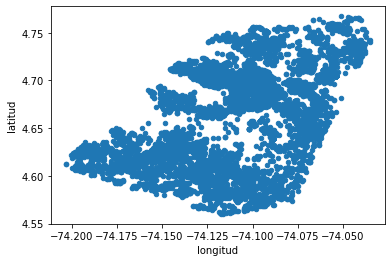

In [8]:
df_train_seg1[["longitud","latitud"]].plot(y ="latitud",x ="longitud",kind="scatter")

In [9]:
def get_cc ():
    html = req.get("https://es.wikipedia.org/wiki/Categor%C3%ADa:Centros_comerciales_de_Bogot%C3%A1")
    html_parsed = BeautifulSoup(html.content)
    data = html_parsed.find("div",attrs={"class":"mw-category"})
    a = re.split("[A-Z]+\n",data.text)
    cc = [re.split("\n",a[i]) for i in range(len(a))] [1:]
    cc = list(itertools.chain(*cc))
    return cc

# import MODULOS.Location as l

# c =  l.Location()

# tab = []
# for i in get_cc():
#     c.get_location(i + ", Bogota Cundinamarca")
#     tab.append([i,c.latitude,c.longitude])

# pd.DataFrame(tab,columns=["cc","lat","lon"]).to_excel(path_0 +"/Data/df_centros_comerciales.xlsx")

In [10]:
estaciones = geopandas.read_file("https://opendata.arcgis.com/datasets/5365d814bbdd4062a59234eea7d70db7_1.geojson")
estaciones  = estaciones[["nombre_estacion","latitud_estacion","longitud_estacion"]]
estaciones.to_excel(path_0 +"/Data/estaciones.xlsx")

In [11]:
patio_troncal = geopandas.read_file("https://opendata.arcgis.com/datasets/e98dd255268c474697e5aab94f4ee58a_0.geojson")
patio_troncal = patio_troncal[["nombre_patio_troncal","latitud_patio_troncal","longitud_patio_troncal"]]
patio_troncal.to_excel(path_0 +"/Data/patio_troncal.xlsx")

In [12]:
# import re
# import requests
# from bs4 import BeautifulSoup
# web = 'https://www.google.com/maps/search/CALLE+100+%238A+49+TORRE+B+OF+702'
# # EL SIMBOLO DE PORCENTAJE SE ESCRIBE %23
# # TRASVERSAL ES TV
# web = 'https://www.google.com/maps/search/CARRERA+72+%23+80+94,+Bogotá'
# # web = 'https://www.google.com/maps/search/TV+77+%23+165+98,+Bogotá'
# # web = 'https://www.google.com/maps/search/DG+40+SUR+%23+26+A+40,+Bogotá'
# # web = "https://www.google.com/maps/search/CARRERA+59+%2327+-+70,+BOGOTA"

# r = requests.get(web)
# soup = BeautifulSoup(r.text)
# mydivs = str(soup.findAll('meta'))
# #### finds Longitud
# long = re.findall(r'-[0-9]+.[0-9]{5,7}', mydivs)[0]
# ###### finds latitud
# lat = re.findall(r'[0-9]+.[0-9]{5,7}', mydivs)[0]
# print(lat,long)

In [13]:
def parques():
    parques = pd.read_csv(path_0+"/Data/parques_urbanos.csv",delimiter=";")
    parques['Full_Name'] = parques['TIPO'].str.cat(parques['NOMBRE'],sep=" ")
    parques = parques["Full_Name"].to_list()
    return parques

# import MODULOS.Location as l

# c =  l.Location()

# tab = []
# for i in parques():
#     c.get_location(i + ", Bogota Cundinamarca")
#     tab.append([i,c.latitude,c.longitude])

# pd.DataFrame(tab,columns=["parque","lat","lon"]).to_excel(path_0 +"/Data/parques_zon_met.xlsx")

In [14]:
import requests
from bs4 import BeautifulSoup
url = "https://oaiee.scj.gov.co/agc/rest/services/Tematicos_Pub/CifrasSCJ/MapServer/1"
reqs = requests.get(url)
soup = BeautifulSoup(reqs.text, 'lxml')
a = []
for tag in soup.find_all("li"):
     a.append([tag.text])
##########
d = []
for i in range(len(a)):
    I = re.search("[A-Z0-9]+" ,a[i][0]).group()
    N = re.sub("\r","",re.search(r'alias: (.*)', a[i][0]).group(1)) 
    d.append([[I],[N]])

crimen = geopandas.read_file(path_0+"/Data/DAIUPZ.geojson")

nem = [d[i][0][0] for i in range(0,len(d))]
names = [d[i][1][0] for i in range(0,len(d))]
replacements = dict(zip(nem, names))
cols = []
for i in range(0,len(d)):
    txt =  crimen.columns.to_list()[i]
    r = re.sub('({})'.format('|'.join(map(re.escape, replacements.keys()))), lambda m: replacements[m.group()], txt)
    cols.append(r)
crimen.columns = cols + [crimen.columns[-1]]
############## ejecutar crimen y filtrar y extraer los puntos de la zona del crimen

total = [col for col in crimen.columns if 'Total ' and "2020" in col][0:-5]
total = total+ [crimen.columns[-1]]

crimen = crimen[total]

############## Punto central de cada upz 
lat = crimen["geometry"].centroid.y
lon = crimen["geometry"].centroid.x
crimen = crimen.iloc[:,:-1]
crimen["lat"] = lat
crimen["lon"] = lon
crimen.to_csv(path_0+"\\Data\\df_crimenupz.csv")

In [15]:
"""https://datosabiertos.bogota.gov.co/dataset/valor-de-referencia-por-metro-cuadrado-de-terreno"""
geo_0 = geopandas.read_file("C:\\Users\\kamsi\\OneDrive\\Escritorio\\V_Ref(2) (1).geojson")
geo_0["ANO"] = pd.to_datetime(geo_0["ANO"],yearfirst=True,format="%Y/%m/%d")
geo_0.set_index("OBJECTID",inplace=True,)
geo_0.index = geo_0.index.map(str)
geo = geo_0.loc[(geo_0["ANO"]>="2020-01-01")&(geo_0["ANO"]<"2020-12-31")]

In [16]:
c = geo["geometry"]
lat = list(map(lambda a:a[0].representative_point().y,c))
lon = list(map(lambda a:a[0].representative_point().x,c))

df_geo = geo.copy()
df_geo["lat"] = lat
df_geo["lon"] = lon
df_geo = df_geo[["V_REF","lat","lon"]]
df_geo.to_csv(path_0+"\\Data\\df_catastro.csv")

In [17]:
pm = pd.read_excel(path_0+"\\Data\\plazas-de-mercado.xlsx")
pm = pm[["Nombre","coord_y","coord_x"]]
pm.to_excel(path_0 +"/Data/plazas_bogota.xlsx")

In [22]:
fac = f.factor()

In [23]:
round(fac,2)

0.06

Epoch 1/64
254/254 [==============================] - 3s 7ms/step - loss: 3939.8109 - mean_absolute_error: 0.1057 - val_loss: 1177250.1250 - val_mean_absolute_error: 0.0800
Epoch 2/64
254/254 [==============================] - 1s 3ms/step - loss: 196.1805 - mean_absolute_error: 0.0382 - val_loss: 3882878.5000 - val_mean_absolute_error: 0.1032
Epoch 3/64
254/254 [==============================] - 0s 1ms/step - loss: 65369.9806 - mean_absolute_error: 0.0861 - val_loss: 16390.8789 - val_mean_absolute_error: 0.0543
Epoch 4/64
254/254 [==============================] - 1s 2ms/step - loss: 2001.7978 - mean_absolute_error: 0.0314 - val_loss: 4883663.5000 - val_mean_absolute_error: 0.1155
Epoch 5/64
254/254 [==============================] - 1s 3ms/step - loss: 43371.7854 - mean_absolute_error: 0.0924 - val_loss: 220574.0312 - val_mean_absolute_error: 0.0534
Epoch 6/64
254/254 [==============================] - 1s 3ms/step - loss: 190.2634 - mean_absolute_error: 0.0303 - val_loss: 756207.5000 

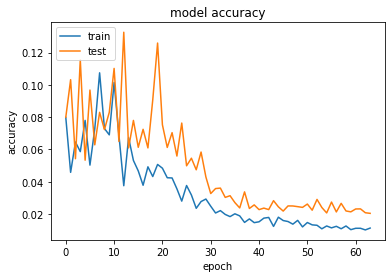

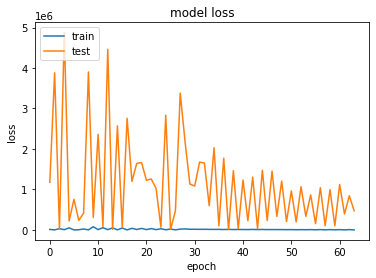

0.3273809523809524

In [111]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from functools import partial
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

path_0 = os.getcwd()

# ---------------------------------------- TRAIN ------------------------------------------

tabla_1 = pd.read_excel(path_0 + '/Data/df_train_0.xlsx', index_col = 'id' )

train_dataset = tabla_1
listado_scores = os.listdir(path_0 + '/Data/scores/')

for lis_ in listado_scores:
    
    df_score = pd.read_excel(path_0 + '/Data/scores/' + lis_, index_col = 0)
    
    if df_score.shape[1] == 2:
        df_score.columns = [lis_[:-5] + '_1', lis_[:-5] + '_2'] 
        train_dataset[[lis_[:-5] + '_1', lis_[:-5] + '_2']] = df_score
        
    else:
        df_score.columns = [lis_[:-5]]
        train_dataset[lis_[:-5]] = df_score

df_y_prima = pd.read_excel(path_0 +'/Data/df_Y_prima_train.xlsx', index_col= 'id')

train_dataset['df_Y_prima'] = df_y_prima
train_labels = train_dataset.pop('df_Y_prima')

X_train = train_dataset
y_train = train_labels

# ---------------------------------------- TEST ------------------------------------------

tabla_1 = pd.read_excel(path_0 + '/Data/df_test_0.xlsx', index_col = 'id' )

train_dataset = tabla_1
listado_scores = os.listdir(path_0 + '/Data/scores_test/')

for lis_ in listado_scores:
    
    df_score = pd.read_excel(path_0 + '/Data/scores_test/' + lis_, index_col = 0)
    
    if df_score.shape[1] == 2:
        df_score.columns = [lis_[:-5] + '_1', lis_[:-5] + '_2'] 
        train_dataset[[lis_[:-5] + '_1', lis_[:-5] + '_2']] = df_score
        
    else:
        df_score.columns = [lis_[:-5]]
        train_dataset[lis_[:-5]] = df_score

df_y_prima = pd.read_excel(path_0 +'/Data/df_Y_prima_test.xlsx', index_col= 'id')

train_dataset['df_Y_prima'] = df_y_prima
train_labels = train_dataset.pop('df_Y_prima')

X_test = train_dataset
y_test = train_labels

# PARAMETROS PARA DESNORMALIZAR
train_minimo = y_train.min()
train_maximo = y_train.max()

test_minimo = y_test.min()
test_maximo = y_test.max()

X_train = (X_train - X_train.min()) / (X_train.max() - X_train.min())
X_test = (X_test - X_test.min()) / (X_test.max() - X_test.min())

y_train = (y_train - y_train.min()) / (y_train.max() - y_train.min())
y_test = (y_test - y_test.min()) / (y_test.max() - y_test.min())

X_train.fillna(0, inplace = True)
X_test.fillna(0, inplace = True)

y_train.fillna(0, inplace = True)
y_test.fillna(0, inplace = True)


def create_model():
    # create model
    model = Sequential()
    model.add(layers.Dense(30, input_dim=X_train.shape[1], activation='relu'))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1))
    # Compile model
    model.compile(optimizer ='adam', loss = tf.keras.losses.MAPE, 
              metrics =[metrics.mae])
    return model

# metrics =[metrics.mae])

model = create_model()

'''

# Define Sequential model with 3 layers
def create_model():
    # create model
    model = Sequential()
    model.add(layers.Dense(5, input_dim=X_train.shape[1], activation='relu'))
    model.add(layers.Dense(2, activation='relu'))
    model.add(layers.Dense(1))
    # Compile model
    model.compile(optimizer ='adam', loss = tf.keras.losses.MAPE, 
              metrics =[metrics.mae])
    return model

model = create_model()
#model.summary()

'''


history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs = 64, batch_size=32)



# summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


ress = pd.DataFrame(X_test).copy()
ress['resl_l'] = pd.DataFrame(y_test)
ress['resl_y'] = model.predict(X_test)


ress['resl_y'] = ress['resl_y'] 

ress['resl_l']

list(map(lambda x: x *  (test_maximo - test_minimo) + test_minimo, ress['resl_y']))

ress.to_excel('resssss_0.xlsx')




from sklearn.metrics import mean_absolute_percentage_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_percentage_error(y_true, y_pred)

In [114]:
test_minimo ,test_maximo 

(1760970.29557293, 4014647.536828393)

In [98]:
def factor():
    a = f.call_IPVN()
    b = f.call_IPVU()
    c = f.call_tin()
    d = f.cartera_vivienda()
    r = f.tasa()
    e = f.call_inflacion()
    f_ = f.call_banrep()
    g = f.call_usd_cop()
    h = f.call_PIB()

    dfs =[a,b,c,d,r]
    all_d = reduce(lambda left,right: pd.merge_asof(left,right,left_index=True,right_index=True),dfs)

    ew = 1/len(all_d.columns)
    
#     n = np.asarray([ew]*len(dfs)).shape[0]
#     init_guess = np.repeat(1/n, n)

    MM = pd.DataFrame((all_d*ew).sum(axis=1),columns=["M_inmobiliario"])

    d =[e,f_,g,h,MM]
    facm = reduce(lambda left,right: pd.merge_asof(left,right,left_index=True,right_index=True),d)

    facm = facm.dropna()

    lm = sm.OLS(endog=facm.iloc[:,-1].astype(float),exog=(facm.iloc[:,0:4]).astype(float)).fit()
    lm.summary()
    
    return lm.predict((facm.iloc[:,0:4]))[-1]

In [101]:
factor()

0.05969145487387329

In [103]:
import pandas as pd
import numpy as np
import os
import MODULOS.Location as lc


path_0 = os.getcwd()
tabla_1 = pd.read_excel(path_0 + '/Data/df_train_0.xlsx', index_col = 'id' )
tabla_1 = tabla_1[['latitud', 'longitud', 'valormetrocuadrado']]
tabla_1['sesgo'] = 0.0

tabla_3 = tabla_1.copy()

tabla_2 = pd.read_excel(path_0 + '/Data/Scores/score_catastro.xlsx', index_col = 'id')
tabla_2.columns = ['score_catastro']
tabla_2[tabla_2['score_catastro'] == 0] = tabla_2[tabla_2!=0].min()[0] # MINIMO

tabla_1['score_catastro'] = tabla_2

modelo_factores = 0.06 # FACTOR MODEL

#for i in range(0, 10):
for i in range(0, tabla_1.shape[0]):
    #break
    
    # VALIDADOR PRECIO LAST CONTRA PRECIO CATASTRO
    if tabla_1.iloc[i, 2] < tabla_1.iloc[i, 4]: continue
    
    # ESTOS CAMPOS PODRIAN CAMBIAR
    lat_ = tabla_1.iloc[i,0]
    lon_ = tabla_1.iloc[i,1]
    
    score_ = lc.Prima_df(lat_, lon_, tabla_1, 0.3)
    score_.get_score()
    
    df_ = score_.df.copy()
    df_[df_['dist_rel'] == 1.0]
    
    if df_.shape[0] == 0: continue
    
    df_['valormetrocuadrado_val']  = df_['valormetrocuadrado'] 
    
    for u in range(100):
        
        df_['sesgo_val'] = list(np.random.uniform(low = -0.06 , high = 0, size = df_.shape[0]))
        df_['Y_prima'] = df_['valormetrocuadrado'] * ( 1 + df_['sesgo_val'])

        if df_['Y_prima'].std() < df_['valormetrocuadrado_val'].std():
            
            df_['sesgo'] = df_['sesgo_val'] 
            df_['valormetrocuadrado_val'] = df_['valormetrocuadrado'] * ( 1 + df_['sesgo_val'])
            
            #print((df_['valormetrocuadrado'] * ( 1 + df_['sesgo'])).std())

    tabla_1.update(df_['sesgo'])
    
    print(i, ' / ', tabla_1.shape[0])
    
    

tabla_1['valormetrocuadrado'] = tabla_1['valormetrocuadrado'] * (1 + tabla_1['sesgo'])
tabla_1 = tabla_1['valormetrocuadrado']
tabla_1.to_excel(path_0 + '/Data/df_Y_prima_train.xlsx')

0  /  8124
1  /  8124
2  /  8124
3  /  8124
4  /  8124
5  /  8124
6  /  8124
7  /  8124
8  /  8124
11  /  8124
12  /  8124
13  /  8124
14  /  8124
15  /  8124
18  /  8124
19  /  8124
20  /  8124
21  /  8124
23  /  8124
26  /  8124
28  /  8124
29  /  8124
30  /  8124
31  /  8124
32  /  8124
33  /  8124
34  /  8124
35  /  8124
36  /  8124
37  /  8124
38  /  8124
40  /  8124
41  /  8124
42  /  8124
43  /  8124
44  /  8124
45  /  8124
47  /  8124
48  /  8124
51  /  8124
54  /  8124
55  /  8124
56  /  8124
57  /  8124
58  /  8124
59  /  8124
60  /  8124
61  /  8124
62  /  8124
63  /  8124
64  /  8124
65  /  8124
66  /  8124
67  /  8124
68  /  8124
69  /  8124
70  /  8124
71  /  8124
72  /  8124
73  /  8124
74  /  8124
75  /  8124
76  /  8124
77  /  8124
79  /  8124
81  /  8124
82  /  8124
84  /  8124
85  /  8124
86  /  8124
87  /  8124
88  /  8124
89  /  8124
90  /  8124
92  /  8124
93  /  8124
95  /  8124
96  /  8124
97  /  8124
98  /  8124
101  /  8124
102  /  8124
103  /  8124
104  /  81